<a href="https://colab.research.google.com/github/Swamyrajgk/Task-6/blob/main/Assignment5_6_7_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

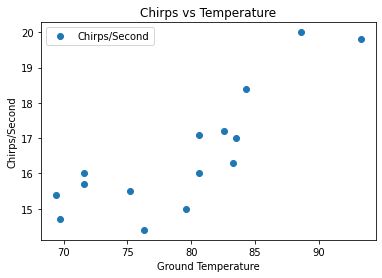

In [ ]:
df.plot(x='Ground Temperature',y='Chirps/Second', style='o')
plt.title('Chirps vs Temperature')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
X = df.iloc[:, :-1].values # select all rows and select all columns except the last column as my feature
y = df.iloc[:, 1].values # target as arrays
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_)

26.164213197969538


In [ ]:
print(regressor.coef_)

[3.18020305]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

y_pred

array([75.1393401 , 75.45736041, 73.86725888, 89.1322335 , 77.04746193])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,69.4,75.139340
1,75.2,75.457360
2,79.6,73.867259
3,93.3,89.132234
4,80.6,77.047462


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6928386089340136


In [ ]:
regressor.predict([[18]])

array([83.40786802])

In [ ]:
(95 - regressor.intercept_) / regressor.coef_

array([21.64509178])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df2 = pd.read_fwf("/content/brain_body.txt")

In [ ]:
df2.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df2.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df3=df2.loc[(df2["Brain"] < 120) & (df2["Body"] < 409) ]
df3.describe()

,Brain,Body
count,50.00000,50.000000
mean,9.97438,41.146400
std,21.61098,66.049681
min,0.00500,0.140000
25%,0.31625,3.125000
50%,1.51500,11.750000
75%,4.22375,48.925000
max,100.00000,325.000000


In [ ]:
df3.corr()

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


In [ ]:
df3.isnull().sum()

Brain    0
Body     0
dtype: int64

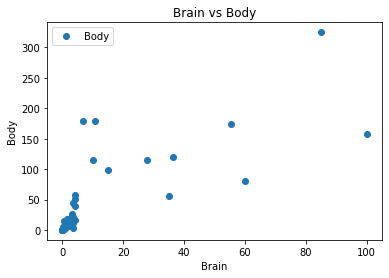

In [ ]:
df3.plot(x='Brain',y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
X = df3.iloc[:, :-1].values # select all rows and select all columns except the last column as my feature
y = df3.iloc[:, 1].values # target as arrays
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 8)

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  

regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.coef_) 

[1.98761338]


In [ ]:
print(regressor.intercept_)

18.423498925046303


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

In [ ]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4

,Actual,Predicted
0,0.33,18.518904
1,50.40,26.841042
2,179.50,39.392820
3,325.00,187.370636
4,2.50,18.630211
5,17.50,21.226034
6,12.10,23.392532
7,44.50,25.151570
8,0.30,18.469214
9,25.00,24.386339


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.5977487232991208


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_fwf("https://raw.githubusercontent.com/Swamyrajgk/Task-6/main/salary1.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [3]:
df.shape

(52, 6)

In [4]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df['Sex'].value_counts()

0    38
1    14
Name: Sex, dtype: int64

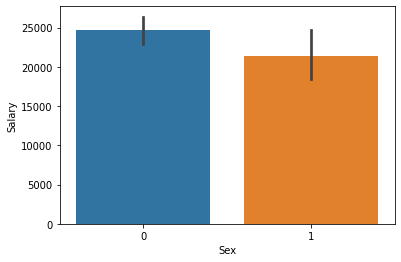

In [6]:
sns.barplot(x='Sex',y='Salary',data=df)

The linear regression equation is : y=1241.79*x + (11410.15)

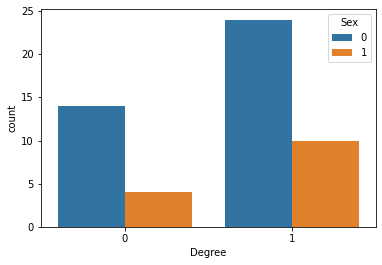

In [7]:
sns.countplot(df.Degree,hue=df.Sex)
plt.show()

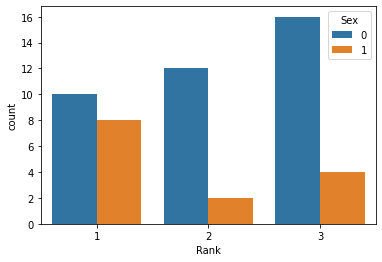

In [8]:
sns.countplot(df.Rank,hue=df.Sex)
plt.show()

In [9]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [10]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [11]:
corr=df.corr()

In [12]:
corr[['Salary']]

,Salary
Sex,-0.252782
Rank,0.867488
Year,0.700669
Degree,-0.069726
YSdeg,0.674854
Salary,1.000000


For Feature Rank,Year and YSdeg

1) High correlation between the data

2) No transformation required

For Feature Sex

1) There is a low linear relationshp between the data

2) No transformation reqd

In [13]:
df[['Salary','Degree']].corr()

,Salary,Degree
Salary,1.000000,-0.069726
Degree,-0.069726,1.000000


In [14]:
df['Degree']=np.sqrt(df['Degree'])

In [15]:
df[['Salary','Degree']].corr()

,Salary,Degree
Salary,1.000000,-0.069726
Degree,-0.069726,1.000000


In [16]:
df=df.drop(['Degree'],axis=1)

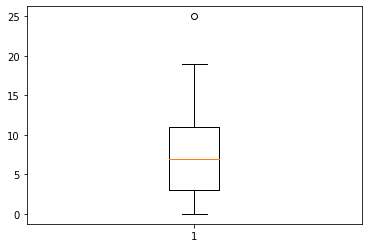

In [19]:
plt.boxplot(df['Year'])
plt.show()

In [20]:
df['Year'].median()

7.0

In [21]:
q25=df['Year'].quantile(0.25)
q75=df['Year'].quantile(0.75)
print(q25,q75)

3.0 11.0


In [22]:
iqr=q75-q25
iqr

8.0

In [23]:
max=q75+(1.5*iqr)
max

23.0

In [24]:
min=q25-(1.5*iqr)
min

-9.0

In [25]:
df=df[(df['Year'] > min) & (df['Year']< max)]

In [26]:
df['Year'].max()

19

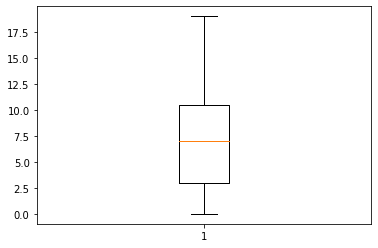

In [27]:
plt.boxplot(df['Year'])
plt.show()

Data Preparation

In [28]:
X=df.drop(['Salary'],axis=1)
y=df['Salary']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(35, 4) (16, 4) (35,) (16,)


In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_test)

In [34]:
model.intercept_

11376.397493208067

In [35]:
model.coef_

array([-342.37627689, 4733.03057959,  385.54867968,  -27.53708292])

In [36]:
coeff_df = pd.DataFrame(model.coef_,['Sex','Rank','Year','YSdeg'], columns=['Coefficient'])

coeff_df

,Coefficient
Sex,-342.376277
Rank,4733.030580
Year,385.548680
YSdeg,-27.537083


According to our model, the Rank feature has biggest impact on target prediction

In [37]:
r2_score(y_test,y_pred)

0.7273659830537846

Find the selection of columns with the best R2 score.

In [38]:
X=df[['Rank']]
y=df[['Salary']]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred_lr=lr.predict(X_test)

In [43]:
r2_score(y_test,y_pred_lr)

0.7002861923463102

Report whether sex is a factor in salary.

Yes, but not as much as Rank